In [1]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore 
from tensorflow.keras.activations import linear, relu, sigmoid # type: ignore 
import matplotlib.pyplot as plt

2025-09-20 18:47:43.641764: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('First image (as array):\n', train_images[0])
print('First label:', train_labels[0])
print('Image shape:', train_images[0].shape)

First image (as array):
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

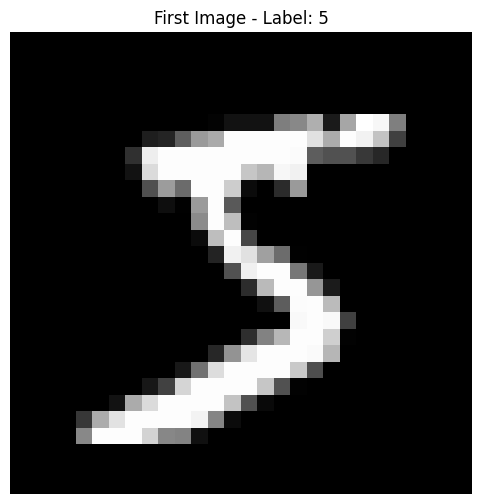

In [4]:
# Display the first image
plt.figure(figsize=(6, 6))
plt.imshow(train_images[0], cmap='gray')
plt.title(f'First Image - Label: {train_labels[0]}')
plt.axis('off')
plt.show()

In [5]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten images from (28, 28) to (784,)
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Pixel value range: {train_images.min()} to {train_images.max()}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)
Pixel value range: 0.0 to 1.0


In [6]:
model = Sequential([
    tf.keras.Input(shape=(784,)),  # type: ignore
    Dense(256, activation='relu', name="L0"),
    Dense(128, activation='relu', name="L1"),  
    Dense(64, activation='relu', name="L2"),     
    Dense(10, activation='linear', name="OL")    # Removed extra layers
], name='mnist_model')

I0000 00:00:1758386869.442624    1642 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5592 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [7]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L0 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OL (Dense)                      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
[layer1, layer2, layer3] = model.layers[:3]

In [9]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 256), b1 shape = (256,)
W2 shape = (256, 128), b2 shape = (128,)
W3 shape = (128, 64), b3 shape = (64,)


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # type: ignore
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # type: ignore
    metrics=['accuracy']
)

history = model.fit(
    train_images, train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_images, test_labels), 
    verbose=1
)

Epoch 1/40


2025-09-20 18:47:55.651366: I external/local_xla/xla/service/service.cc:163] XLA service 0x75f7c8005720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-20 18:47:55.651392: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-09-20 18:47:56.509539: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-20 18:47:57.093105: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-09-20 18:47:57.165841: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-20 18:47:57.165883: 

KeyboardInterrupt: 

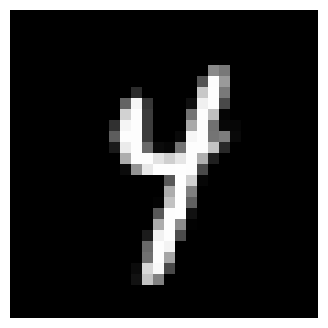

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicting digit: 
[[-15.394892  -11.518175  -25.491144  -35.090656   27.39034   -29.255928
  -22.22221   -21.231585  -10.0150585  -0.8575927]]
Predicted digit: 4
Actual label: 4
Predicting digit: 
[[-15.394892  -11.518175  -25.491144  -35.090656   27.39034   -29.255928
  -22.22221   -21.231585  -10.0150585  -0.8575927]]
Predicted digit: 4
Actual label: 4


In [ ]:
# Test prediction on a single image
def display_digit(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Get a test image
image_of_four = test_images[1015] 
display_digit(image_of_four* 255)  

# Make prediction
prediction = model.predict(image_of_four.reshape(1, 784))  

print(f"Predicting digit: \n{prediction}")
print(f"Predicted digit: {np.argmax(prediction)}")
print(f"Actual label: {test_labels[1015]}")


Test Image #1 (Index 0)


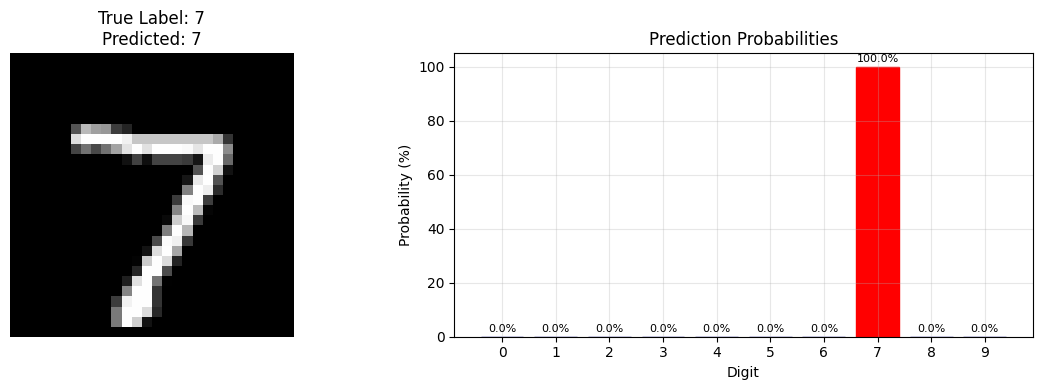

Detailed probabilities:
Digit 0:  0.00%
Digit 1:  0.00%
Digit 2:  0.00%
Digit 3:  0.00%
Digit 4:  0.00%
Digit 5:  0.00%
Digit 6:  0.00%
Digit 7: 100.00% ← PREDICTED
Digit 8:  0.00%
Digit 9:  0.00%

Confidence: 100.00%
Correct prediction: ✓

Test Image #2 (Index 1015)


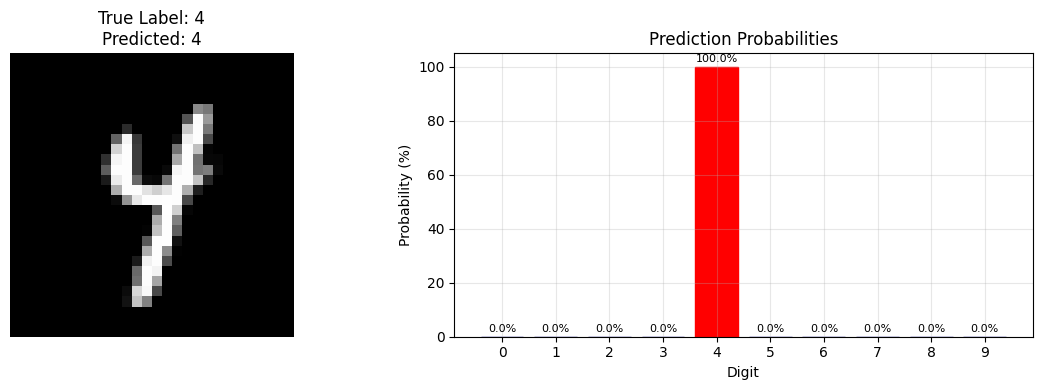

Detailed probabilities:
Digit 0:  0.00%
Digit 1:  0.00%
Digit 2:  0.00%
Digit 3:  0.00%
Digit 4: 100.00% ← PREDICTED
Digit 5:  0.00%
Digit 6:  0.00%
Digit 7:  0.00%
Digit 8:  0.00%
Digit 9:  0.00%

Confidence: 100.00%
Correct prediction: ✓

Test Image #3 (Index 100)


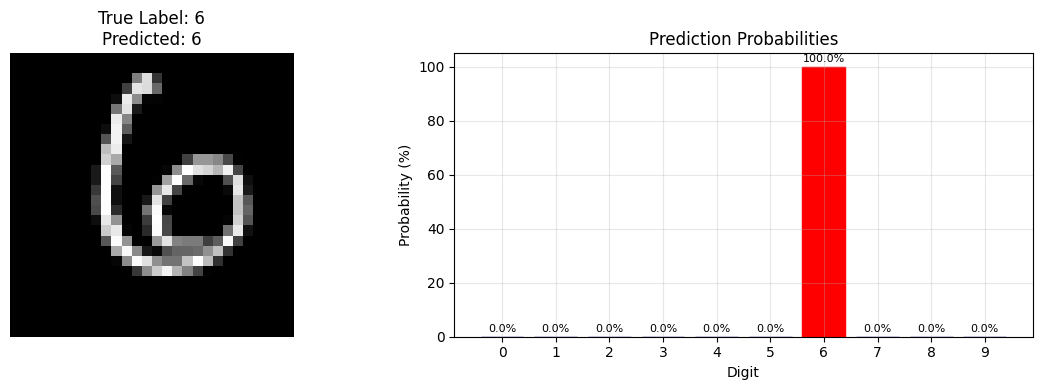

Detailed probabilities:
Digit 0:  0.00%
Digit 1:  0.00%
Digit 2:  0.00%
Digit 3:  0.00%
Digit 4:  0.00%
Digit 5:  0.00%
Digit 6: 100.00% ← PREDICTED
Digit 7:  0.00%
Digit 8:  0.00%
Digit 9:  0.00%

Confidence: 100.00%
Correct prediction: ✓

Test Image #4 (Index 500)


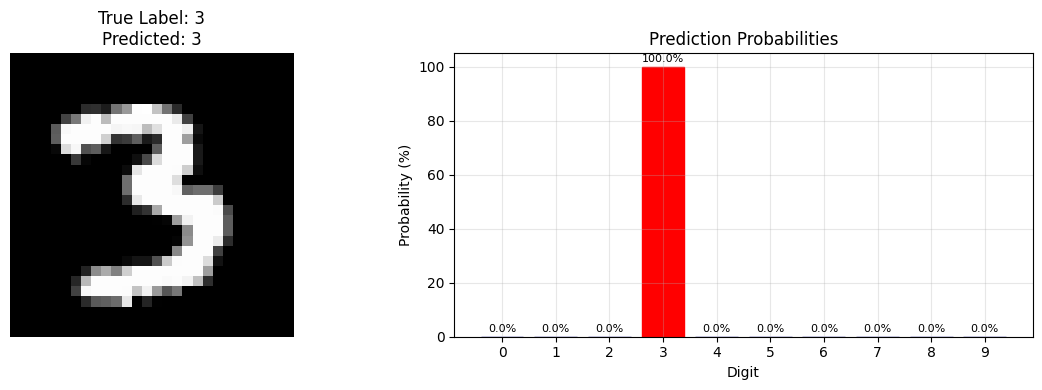

Detailed probabilities:
Digit 0:  0.00%
Digit 1:  0.00%
Digit 2:  0.00%
Digit 3: 100.00% ← PREDICTED
Digit 4:  0.00%
Digit 5:  0.00%
Digit 6:  0.00%
Digit 7:  0.00%
Digit 8:  0.00%
Digit 9:  0.00%

Confidence: 100.00%
Correct prediction: ✓

Test Image #5 (Index 999)


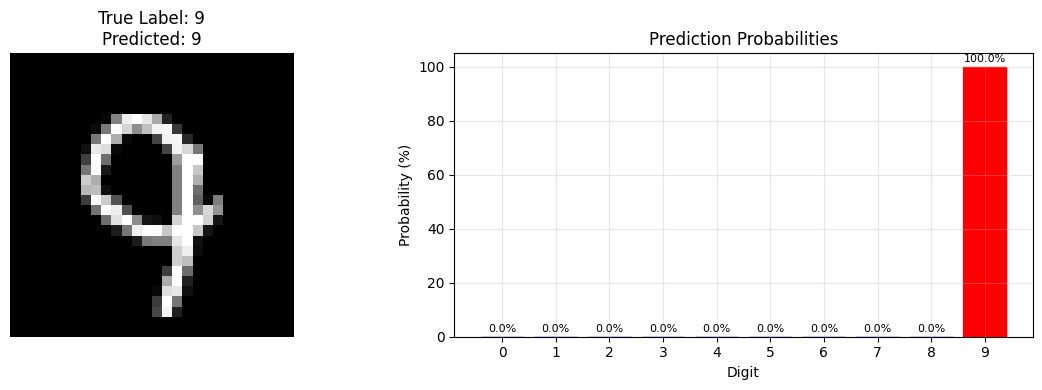

Detailed probabilities:
Digit 0:  0.00%
Digit 1:  0.00%
Digit 2:  0.00%
Digit 3:  0.00%
Digit 4:  0.00%
Digit 5:  0.00%
Digit 6:  0.00%
Digit 7:  0.00%
Digit 8:  0.00%
Digit 9: 100.00% ← PREDICTED

Confidence: 100.00%
Correct prediction: ✓


In [ ]:
# Show probability distribution for prediction
def show_prediction_probabilities(image, true_label, model):

    prediction = model.predict(image.reshape(1, 784), verbose=0)
    

    probabilities = tf.nn.softmax(prediction).numpy()[0]
    predicted_digit = np.argmax(probabilities)
    

    plt.figure(figsize=(12, 4))
    
    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {true_label}\nPredicted: {predicted_digit}')
    plt.axis('off')
    
    # Plot probability distribution
    plt.subplot(1, 2, 2)
    digits = np.arange(10)
    bars = plt.bar(digits, probabilities * 100, color='lightblue', edgecolor='navy')
    
    # Highlight the predicted digit
    bars[predicted_digit].set_color('red')
    
    plt.xlabel('Digit')
    plt.ylabel('Probability (%)')
    plt.title('Prediction Probabilities')
    plt.xticks(digits)
    plt.grid(True, alpha=0.3)
    
    # Add percentage labels on bars
    for i, prob in enumerate(probabilities):
        plt.text(i, prob * 100 + 1, f'{prob*100:.1f}%', 
                ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed probabilities
    print(f"Detailed probabilities:")
    for digit, prob in enumerate(probabilities):
        marker = " ← PREDICTED" if digit == predicted_digit else ""
        print(f"Digit {digit}: {prob*100:5.2f}%{marker}")
    
    print(f"\nConfidence: {probabilities[predicted_digit]*100:.2f}%")
    print(f"Correct prediction: {'✓' if predicted_digit == true_label else '✗'}")

# Test with a few different images
test_indices = [0, 1015, 100, 500, 999]
for i, idx in enumerate(test_indices):
    print(f"\n{'='*50}")
    print(f"Test Image #{i+1} (Index {idx})")
    print(f"{'='*50}")
    show_prediction_probabilities(test_images[idx], test_labels[idx], model)

In [ ]:
# Evaluate model performance on test data
print("Evaluating model on test data...")
print("="*50)

# Get overall test accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions on entire test set
predictions = model.predict(test_images, verbose=0)
predicted_labels = np.argmax(tf.nn.softmax(predictions), axis=1)

# Calculate accuracy manually for verification
correct_predictions = np.sum(predicted_labels == test_labels)
manual_accuracy = correct_predictions / len(test_labels)
print(f"Manual verification: {correct_predictions}/{len(test_labels)} = {manual_accuracy:.4f} ({manual_accuracy*100:.2f}%)")

# Per-digit accuracy analysis
print(f"\nPer-digit accuracy:")
print("-" * 30)
for digit in range(10):
    digit_mask = test_labels == digit
    digit_predictions = predicted_labels[digit_mask]
    digit_actual = test_labels[digit_mask]
    digit_accuracy = np.sum(digit_predictions == digit_actual) / len(digit_actual)
    digit_count = len(digit_actual)
    print(f"Digit {digit}: {digit_accuracy:.3f} ({digit_accuracy*100:5.1f}%) - {digit_count} samples")

# Show confusion matrix style summary
print(f"\nOverall Performance Summary:")
print("-" * 30)
print(f"Total test samples: {len(test_labels)}")
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {len(test_labels) - correct_predictions}")
print(f"Overall accuracy: {test_accuracy*100:.2f}%")

Evaluating model on test data...
Test Loss: 0.1403
Test Accuracy: 0.9820 (98.20%)
Test Loss: 0.1403
Test Accuracy: 0.9820 (98.20%)
Manual verification: 9820/10000 = 0.9820 (98.20%)

Per-digit accuracy:
------------------------------
Digit 0: 0.995 ( 99.5%) - 980 samples
Digit 1: 0.988 ( 98.8%) - 1135 samples
Digit 2: 0.977 ( 97.7%) - 1032 samples
Digit 3: 0.980 ( 98.0%) - 1010 samples
Digit 4: 0.982 ( 98.2%) - 982 samples
Digit 5: 0.980 ( 98.0%) - 892 samples
Digit 6: 0.978 ( 97.8%) - 958 samples
Digit 7: 0.972 ( 97.2%) - 1028 samples
Digit 8: 0.980 ( 98.0%) - 974 samples
Digit 9: 0.988 ( 98.8%) - 1009 samples

Overall Performance Summary:
------------------------------
Total test samples: 10000
Correct predictions: 9820
Incorrect predictions: 180
Overall accuracy: 98.20%
Manual verification: 9820/10000 = 0.9820 (98.20%)

Per-digit accuracy:
------------------------------
Digit 0: 0.995 ( 99.5%) - 980 samples
Digit 1: 0.988 ( 98.8%) - 1135 samples
Digit 2: 0.977 ( 97.7%) - 1032 samples

In [ ]:
# Save the trained model weights for use in canvas.py
model.save_weights('mnist_model.weights.h5')
print("Model weights saved as 'mnist_model_weights.h5'")

# Optional: Also save the entire model
model.save('mnist_complete_model.h5')
print("Complete model saved as 'mnist_complete_model.h5'")

Model weights saved as 'mnist_model_weights.h5'
Complete model saved as 'mnist_complete_model.h5'
